In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('Admission_Predict.csv')

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.shape

(400, 9)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold = 0.75)
df['Chance of Admit '] = bi.fit_transform (df[['Chance of Admit ']])

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [ ]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [ ]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [ ]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [ ]:
y = y.astype('int')

In [ ]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

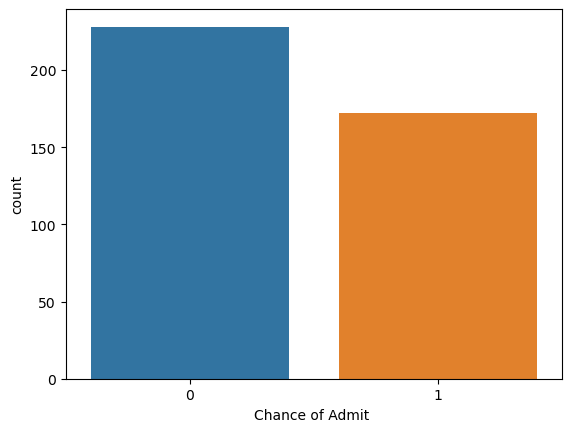

In [ ]:
sns. countplot(x = y)

In [ ]:
y.value_counts()

0    228
1    172
Name: Chance of Admit , dtype: int64

In [ ]:
# Cross-Validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

In [ ]:
x_train.shape

(300, 8)

In [ ]:
x_test.shape

(100, 8)

In [ ]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [ ]:
x_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
250,251,320,104,3,3.0,2.5,8.57,1
63,64,315,107,2,4.0,3.0,8.50,1
312,313,311,107,4,4.5,4.5,9.00,1
159,160,297,100,1,1.5,2.0,7.90,0
283,284,321,111,3,2.5,3.0,8.90,1
...,...,...,...,...,...,...,...,...
323,324,305,102,2,2.0,2.5,8.18,0
192,193,322,114,5,4.5,4.0,8.94,1
117,118,290,104,4,2.0,2.5,7.46,0
47,48,339,119,5,4.5,4.0,9.70,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier(random_state = 0)

In [ ]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

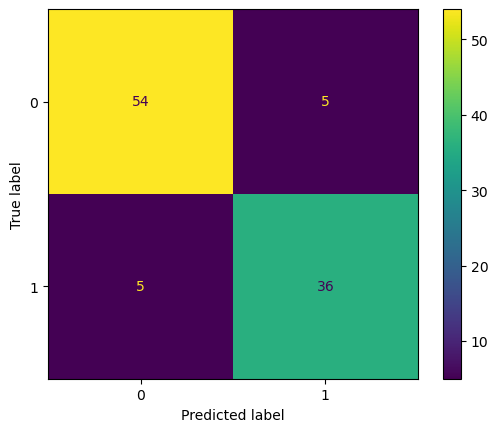

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

0.9

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [ ]:
new = [[136,314,109,4,3.5,4.0,8.77,1]]
classifier.predict(new)[0]

C:\Users\91916\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

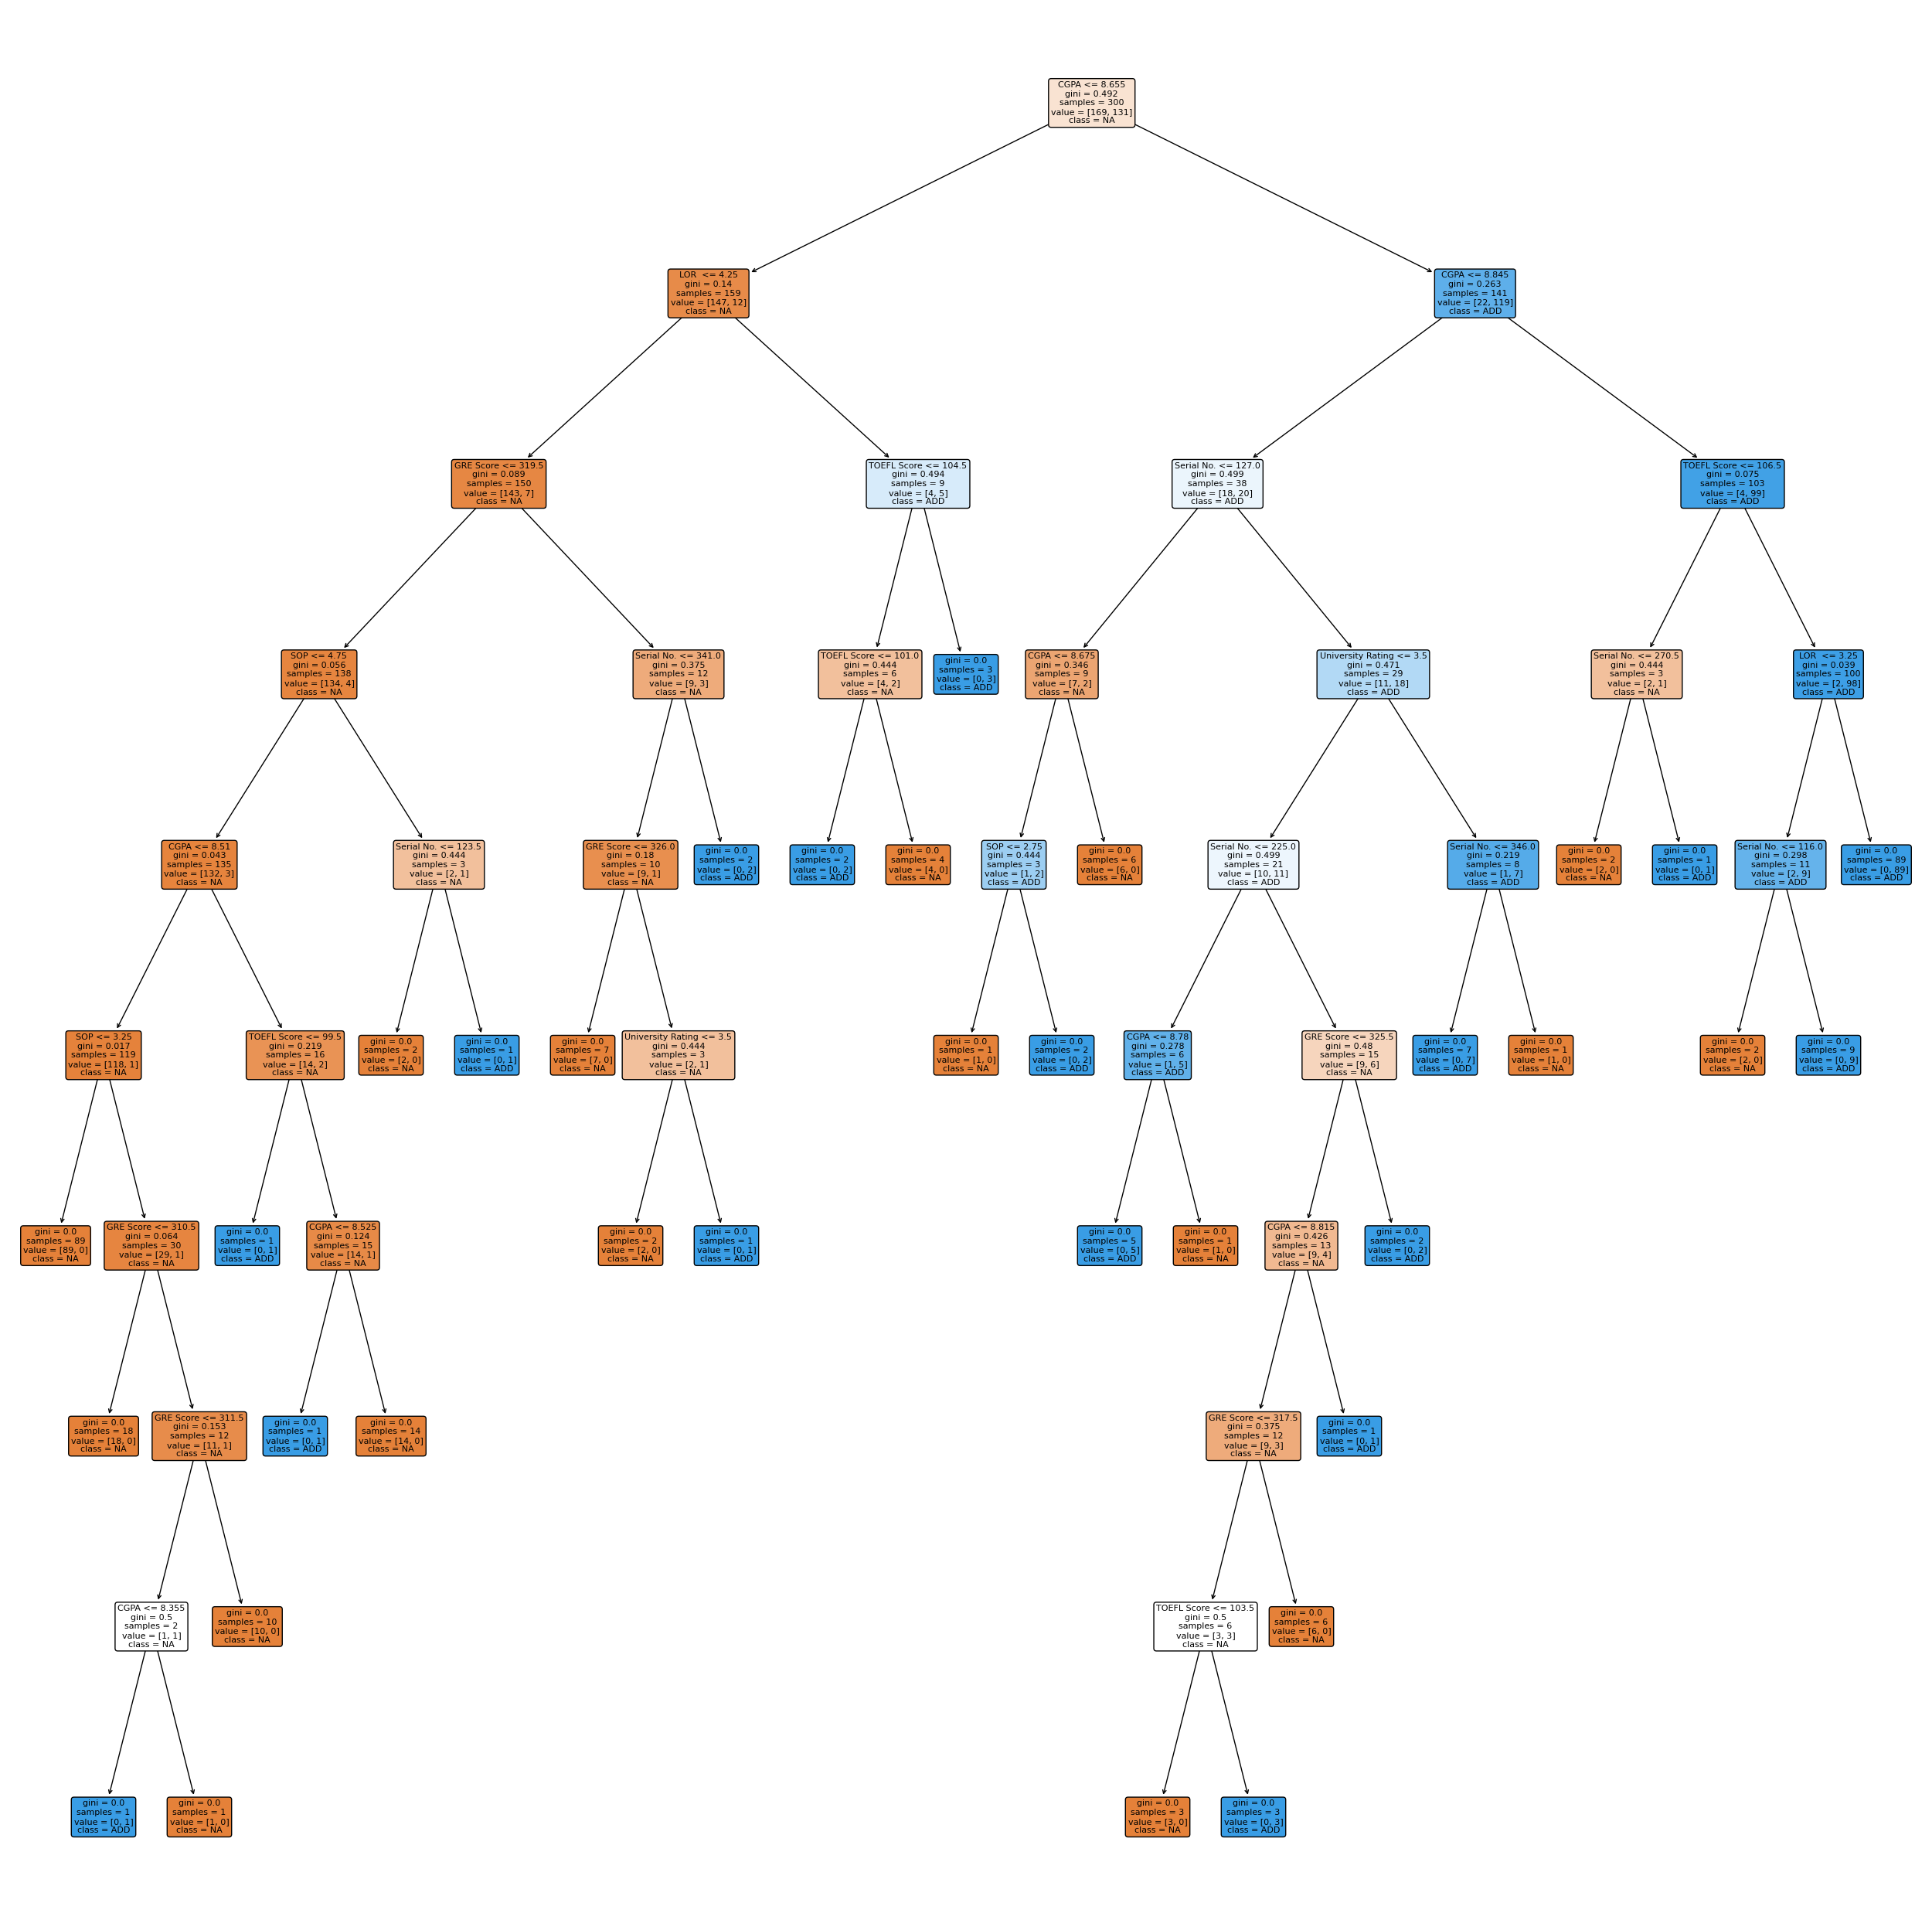

In [ ]:
plt.figure(figsize=(32,32))
plot_tree (classifier, fontsize=8, filled= True, rounded=True, feature_names=x.columns, class_names=['NA', 'ADD']);